## Histogram, KdePlot, DistPlot

### Histogram 

plt.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

tip_data = sns.load_dataset('tips')
tip_data['tip_pct'] = 100 * tip_data.tip / tip_data.total_bill
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


(array([0.        , 0.00433884, 0.0231405 , 0.0303719 , 0.07520661,
        0.08677686, 0.07665289, 0.03326446, 0.01012397, 0.0072314 ,
        0.00144628, 0.00144628, 0.        , 0.        ]),
 array([ 0.        ,  2.85714286,  5.71428571,  8.57142857, 11.42857143,
        14.28571429, 17.14285714, 20.        , 22.85714286, 25.71428571,
        28.57142857, 31.42857143, 34.28571429, 37.14285714, 40.        ]),
 <a list of 14 Patch objects>)

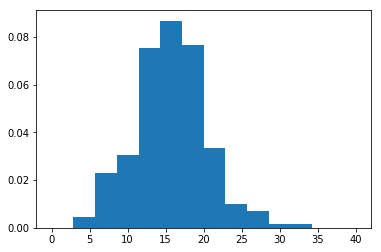

In [69]:
plt.hist(tip_data.tip_pct, density=True, bins=np.linspace(0, 40, 15))

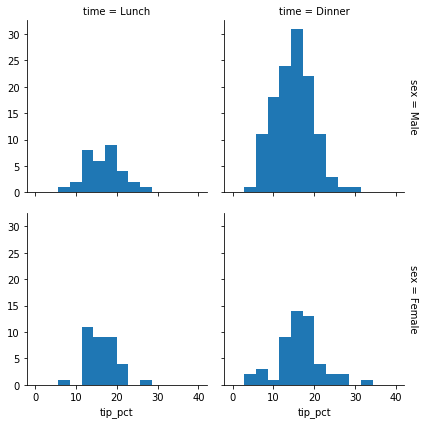

In [70]:
grid = sns.FacetGrid(tip_data, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

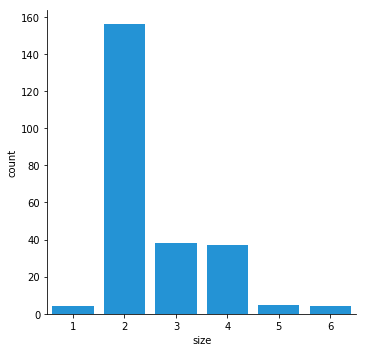

In [87]:
sns.catplot(x='size', data=tip_data, kind='count', color='xkcd:azure') # only for discrete values: size in this case.

### KdePlot

KDE: Kernal Density Estimation

sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

Fit and plot a univariate or bivariate kernel density estimate.

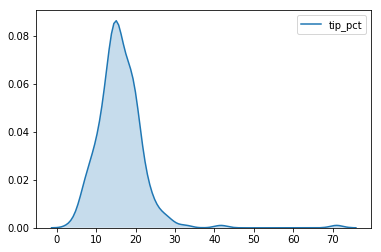

In [72]:
sns.kdeplot(tip_data.tip_pct, shade=True) # univariate KDE

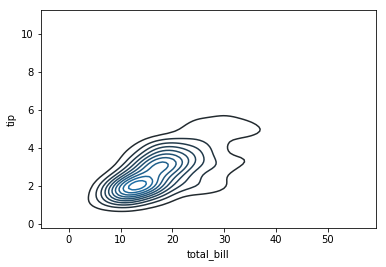

In [76]:
sns.kdeplot(tip_data.total_bill, tip_data.tip) # bivariate KDE

### DistPlot

sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
             hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, 
             color=None, vertical=False, norm_hist=False, axlabel=None, 
             label=None, ax=None)
             
This function combines the matplotlib ``hist`` function (with automatic calculation of a good default bin size) with the seaborn :func:`kdeplot`

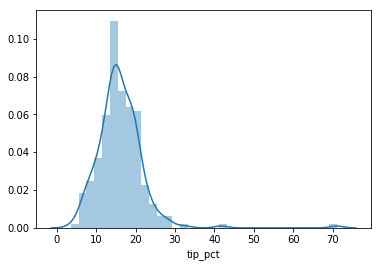

In [73]:
sns.distplot(tip_data.tip_pct)

## Joint Plot & Pair Plot

### JointPlot

sns.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

Draw a plot of two variables with bivariate and univariate graphs.

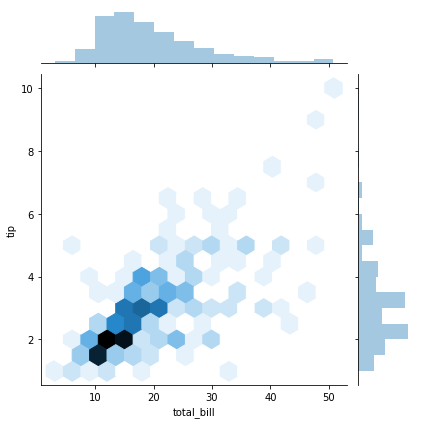

In [81]:
sns.jointplot(x='total_bill', y='tip', data=tip_data, kind='hex') # kind: "scatter","reg", "resid", "kde" "hex"

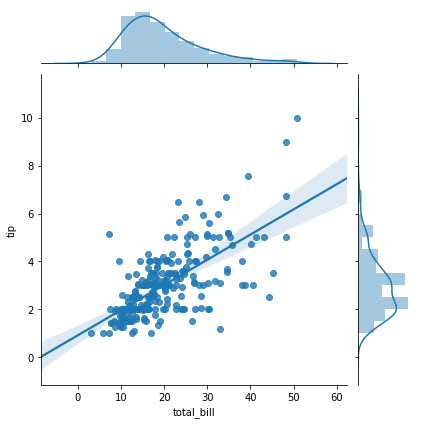

In [80]:
sns.jointplot('total_bill', 'tip', tip_data, kind='reg')

### PairPlot & PairGrid

sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

Plot pairwise relationships in a dataset.

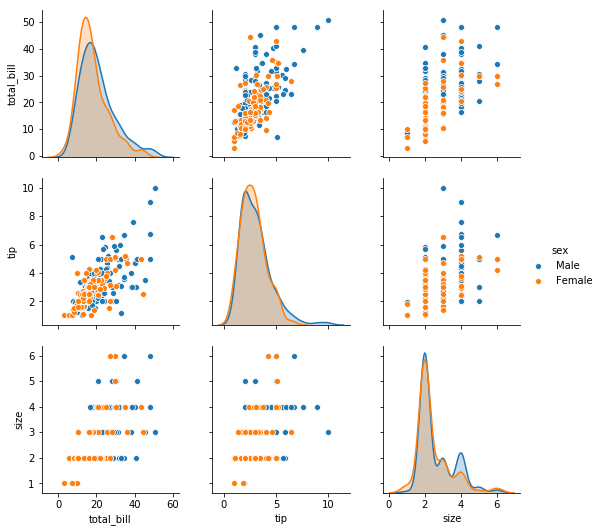

In [84]:
sns.pairplot(tip_data, vars=['total_bill', 'tip', 'size'], hue='sex')

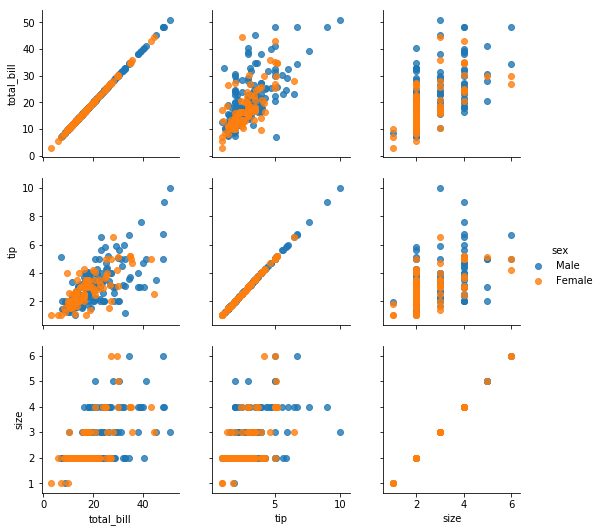

In [85]:
g = sns.PairGrid(tip_data, vars=['total_bill', 'tip', 'size'], hue='sex')
g.map(plt.scatter, alpha=0.8) # Plot with the same function in every subplot.
g.add_legend()

## CatPlot

sns.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x117ea3ae8>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- :func:`boxplot` (with ``kind="box"``)
- :func:`violinplot` (with ``kind="violin"``)
- :func:`boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- :func:`pointplot` (with ``kind="point"``)
- :func:`barplot` (with ``kind="bar"``)
- :func:`countplot` (with ``kind="count"``)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tip_data = sns.load_dataset('tips')
tip_data['tip_pct'] = 100 * tip_data.tip / tip_data.total_bill
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


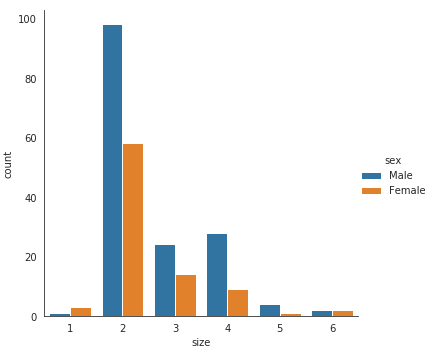

In [57]:
with sns.axes_style(style='white'): # 'cat plot' refers to categorical plots, this is where its advantage lies
    sns.catplot(x='size', hue='sex', data=tip_data, kind='count', aspect=1)

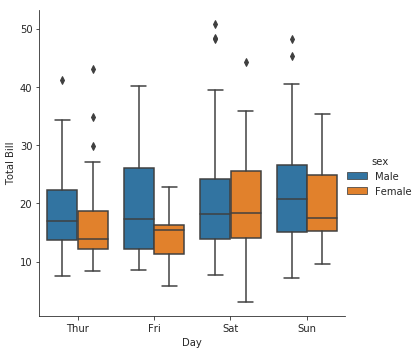

In [41]:
with sns.axes_style(style='ticks'): # style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tip_data, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

/Users/douyujie1/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


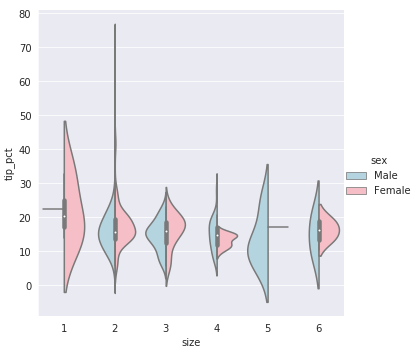

In [65]:
with sns.axes_style(style='darkgrid'):
    sns.catplot(x='size', y='tip_pct', hue='sex', data=tip_data, 
                kind='violin', split=True, palette=['lightblue', 'lightpink'])